# Autoencoder
Autoencoder from https://www.python-engineer.com/posts/pytorch-autoencoder/
and adapted using code by Tariq Rashid at https://github.com/makeyourownneuralnetwork/gan <br>
attempt to do batch size <br>
Contents:<br>
1. Program Definition
2. Training Autoencoder
3. Saving outputs during training into CSV
4. Visualise output
5. Saving final outputs

## 1. Program Definition

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt
import csv

In [2]:
# dataset class - this will load data into dataframe, and has functions to check the image

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # return label, image data tensor and target tensor
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [3]:
# autoencoder class, adapted from both tariq rashid's GAN and PythonEngineer's AE

class Autoencoder(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # N,784 -> reduce to N,128
            nn.ReLU(), # activation function
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # final output size is N, 3
        ) #ie. 3 pixels
        
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), # N,3 -> increase to N,784
            nn.ReLU(), # activation function
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28), # then needs activation function to put
            nn.Sigmoid()                 # values back into the range 0-1
        ) 
        
        # create loss function
        self.loss_function = nn.MSELoss() # can use BSE

         # create optimiser, using simple stochastic gradient descent / Adam
        self.optimiser = torch.optim.Adam(self.parameters(), lr=0.001) # can use Adam

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    
    def encoded(self, inputs):
        
        return 
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    
    pass

In [4]:
# load MNIST dataset
mnist_dataset = MnistDataset('mnist_dataset/mnist_train.csv')

### 2. Training Autoencoder

In [14]:
# AE train

from timeit import default_timer as timer
model = Autoencoder()
outputs = []

loss_function = nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay = 1e-5)

num_epochs = 10

start = timer()

for epoch in range(num_epochs):
    counter = 0
    for label, image_data_tensor, target_tensor in mnist_dataset:
        img = image_data_tensor # image_data_tensor is a tuple with label, image pixels, target outputs
        recon = model(img) # column 1 in tuple has the pixel values
        # save data     
        
        loss = loss_function(recon, img)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
     
        if counter < 10:
            outputs.append((label, img, recon),)  
        if counter == 10000:
            break
        if counter%1000 == 0:
            print('counter', counter)
        counter =+ 1
    print('Epoch:', epoch,', loss:', loss)
    

end = timer()

print('time taken:', end-start)

counter 0
Epoch: 0 , loss: tensor(0.0394, grad_fn=<MseLossBackward>)
counter 0
Epoch: 1 , loss: tensor(0.0405, grad_fn=<MseLossBackward>)
counter 0
Epoch: 2 , loss: tensor(0.0403, grad_fn=<MseLossBackward>)
counter 0
Epoch: 3 , loss: tensor(0.0396, grad_fn=<MseLossBackward>)
time taken: 1607.4885656000006


### 3. Saving output at various points during training into CSV

In [24]:
# convert data from torch into numpy arrays and save data into csv file 
import numpy
import matplotlib
import matplotlib.pyplot as plt
import csv

imgs = []
recons = []
labels = []

# extract outputs from above save them into arrays
# outputs is an array where each line is
# (label, [784 original pixel values], [784 reconstructed values])

for k in range(0, num_epochs):
    img = outputs[k*60000][1].detach().numpy() # get the original images
    imgs.append(img)
    recon = outputs[k*60000][2].detach().numpy()
    recons.append(recon)
    label = outputs[k*60000][0]
    labels.append(label)

# save into csv
with open('M2.3_ae_data_epochs.csv','w', newline='') as f:
    writer = csv.writer(f)
    
    for i in range(0, len(labels)):
        target = labels[i]
        z = (target, -10) # -10 denotes original image
        row1 = numpy.append(z, imgs[i])
        writer.writerow(row1)

        y = (target, -20) # -20 denotes reconstructed image
        row2 = numpy.append(y, recons[i])
        writer.writerow(row2)
        pass


(80, 784)
Orignial


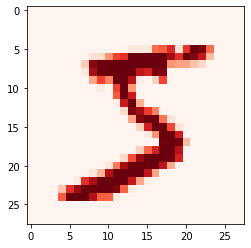

Reconstructed


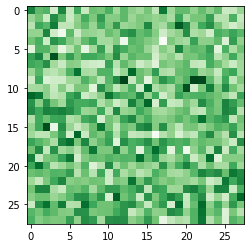

Orignial


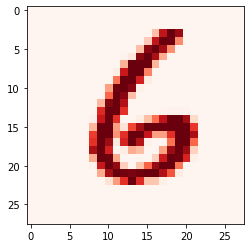

Reconstructed


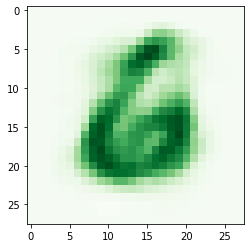

Orignial


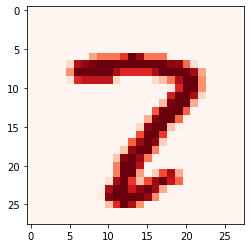

Reconstructed


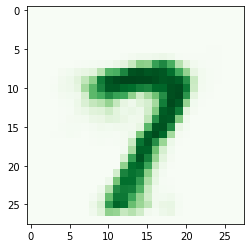

Orignial


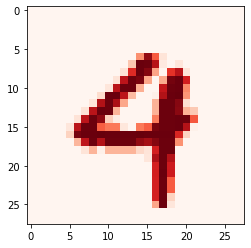

Reconstructed


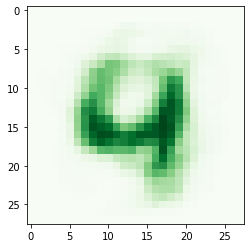

Orignial


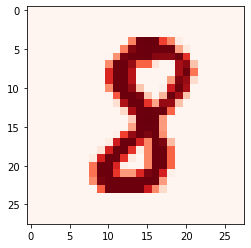

Reconstructed


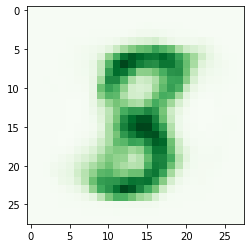

Orignial


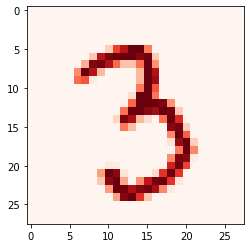

Reconstructed


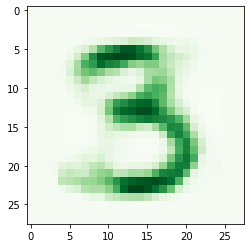

Orignial


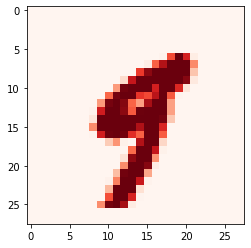

Reconstructed


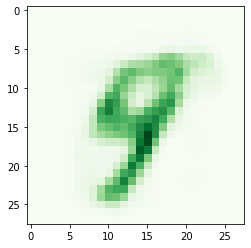

Orignial


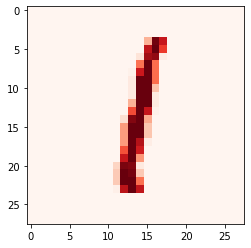

Reconstructed


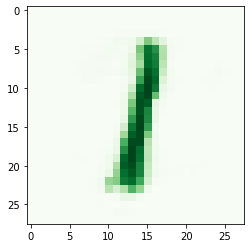

Orignial


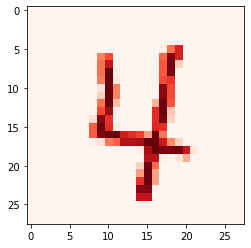

Reconstructed


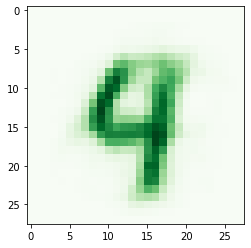

Orignial


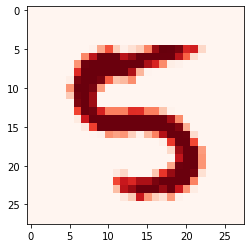

Reconstructed


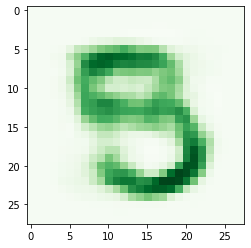

Orignial


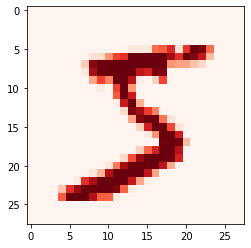

Reconstructed


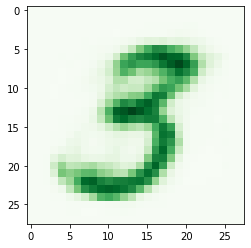

Orignial


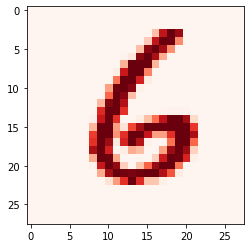

Reconstructed


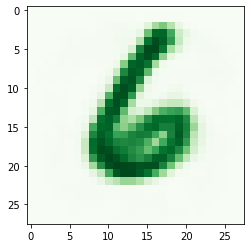

Orignial


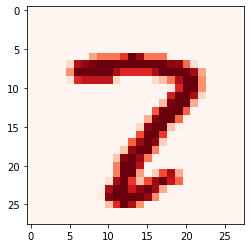

Reconstructed


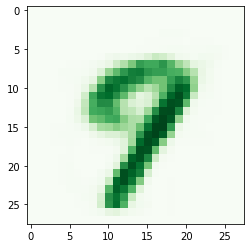

Orignial


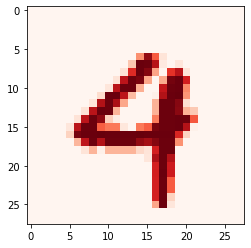

Reconstructed


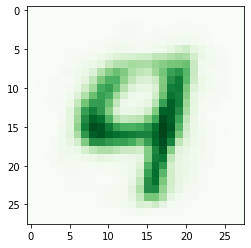

Orignial


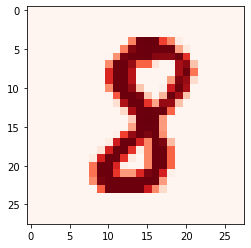

Reconstructed


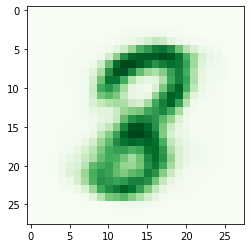

Orignial


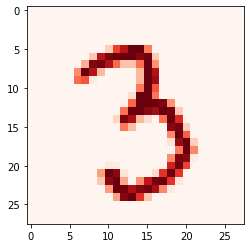

Reconstructed


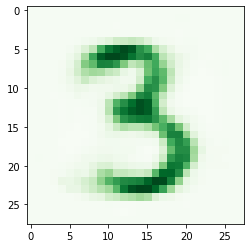

Orignial


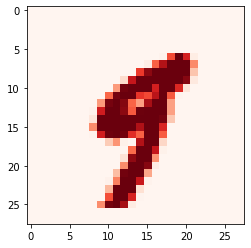

Reconstructed


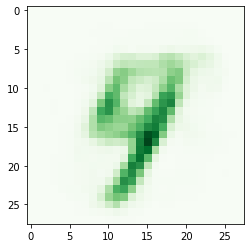

Orignial


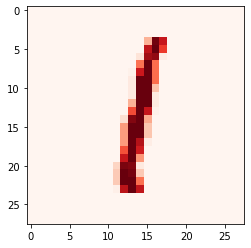

Reconstructed


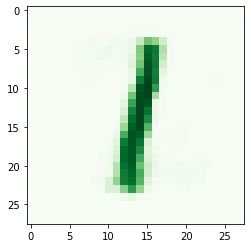

Orignial


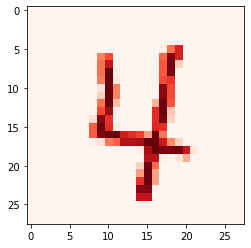

Reconstructed


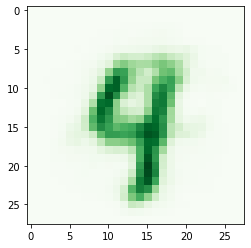

Orignial


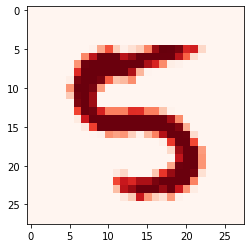

Reconstructed


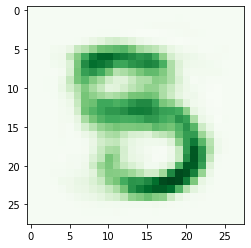

Orignial


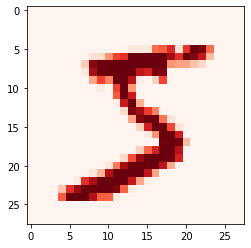

Reconstructed


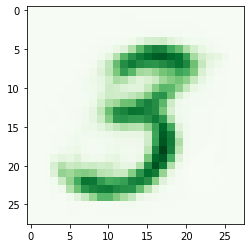

Orignial


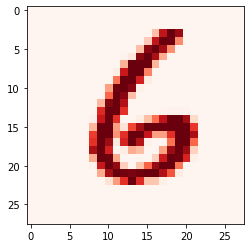

Reconstructed


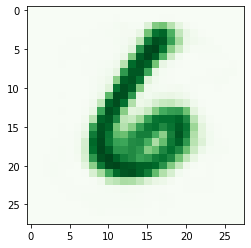

Orignial


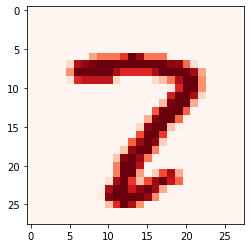

Reconstructed


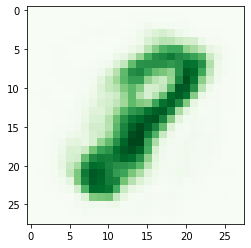

Orignial


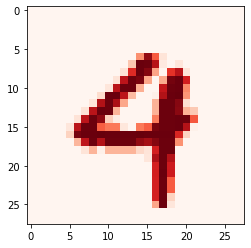

Reconstructed


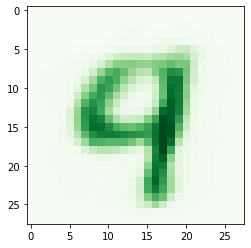

Orignial


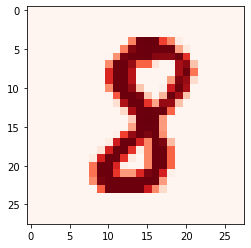

Reconstructed


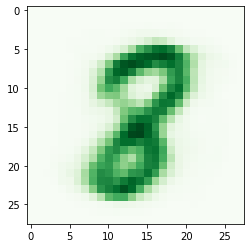

Orignial


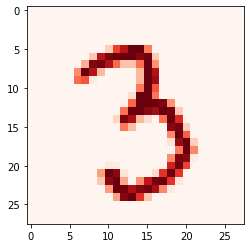

Reconstructed


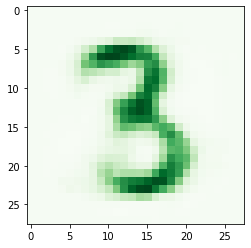

Orignial


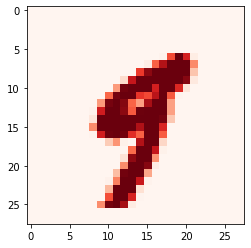

Reconstructed


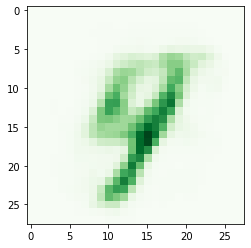

Orignial


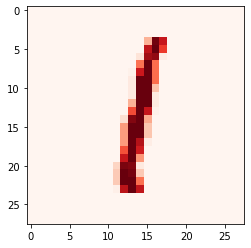

Reconstructed


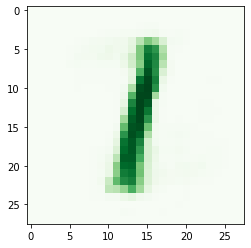

Orignial


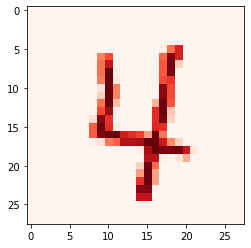

Reconstructed


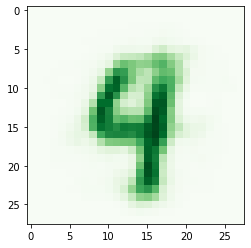

Orignial


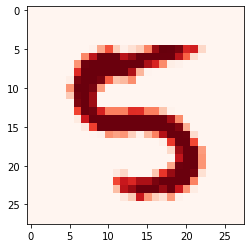

Reconstructed


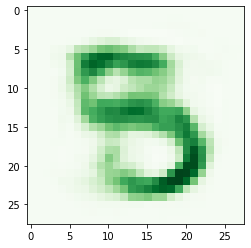

Orignial


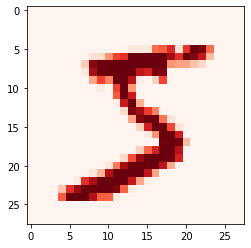

Reconstructed


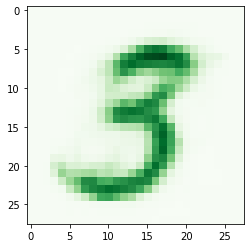

Orignial


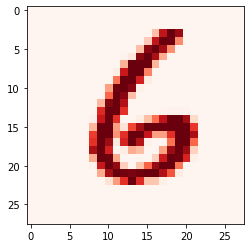

Reconstructed


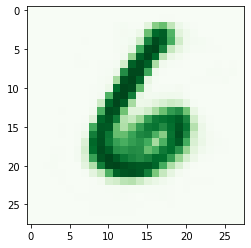

Orignial


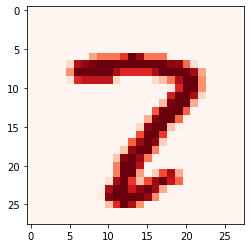

Reconstructed


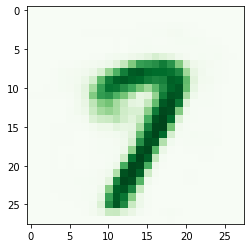

Orignial


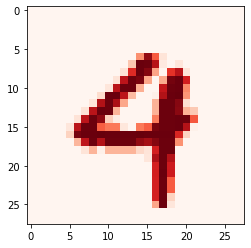

Reconstructed


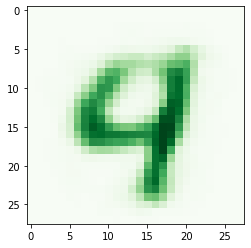

Orignial


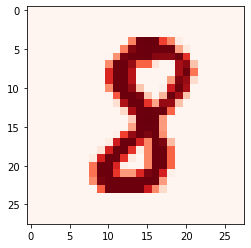

Reconstructed


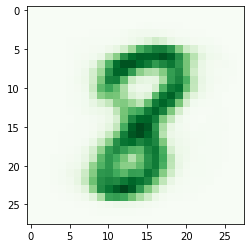

Orignial


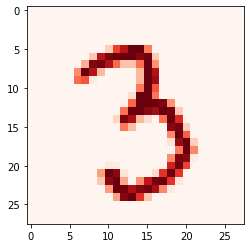

Reconstructed


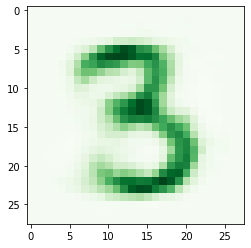

Orignial


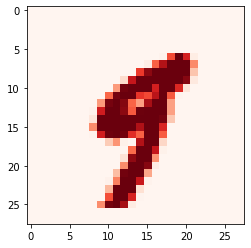

Reconstructed


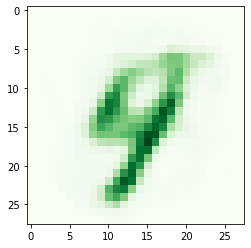

Orignial


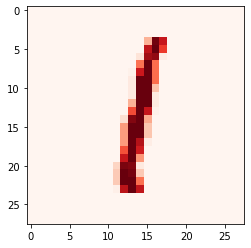

Reconstructed


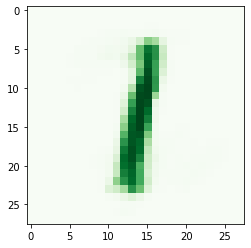

Orignial


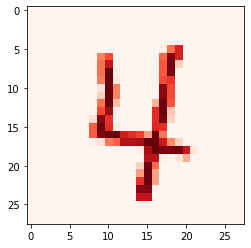

Reconstructed


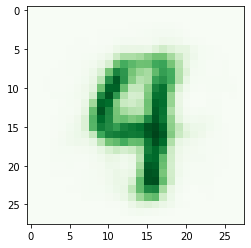

Orignial


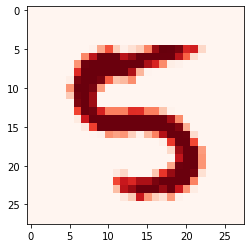

Reconstructed


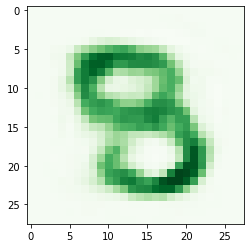

In [34]:
# load into arrays
imgs = []
recon = []
labels = []
orig_or_recon = []
values = []

with open('M2.3_ae_data_epochs.csv', newline='') as f:
    csv_data = csv.reader(f)
    for row in csv_data:
        labels.append(row[0])
        orig_or_recon.append(row[1])
        values.append(row[2:])
        

labels = numpy.asfarray(labels)
orig_or_recon = numpy.asfarray(orig_or_recon)
values = numpy.asfarray(values)
print(numpy.shape(values))

for i in range(0,len(labels)):
    if orig_or_recon[i] == -10: # if -10, then it is an original
        print('Orignial')
        imgs.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Reds') 
        plt.show()
    else: # else it is a reconstructed image
        print('Reconstructed')
        recon.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Greens') 
        plt.show()

        
   

### 4. Visualise output

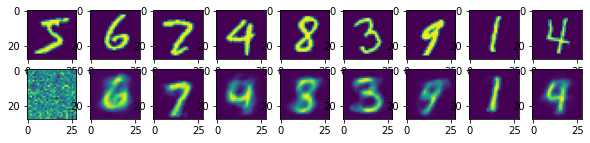

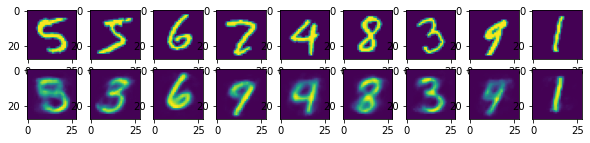

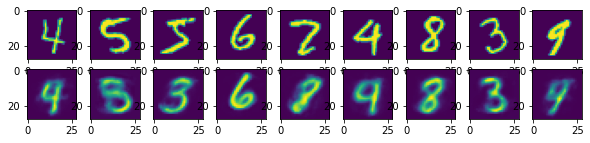

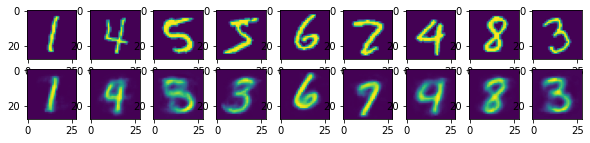

In [35]:
for k in range(0, num_epochs): # plot the with every dimension
    plt.figure(figsize=(10, 2))

    for i, item in enumerate(imgs): # enumerate - get counter per loop
        if i >= 9: break            # plot first 9 images
        plt.subplot(2, 9, i+1)
        item = imgs[k*9+i].reshape(-1, 28, 28)    
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):  
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        item = recon[k*9+i].reshape(-1, 28, 28)
        plt.imshow(item[0])

## 5. Saving final output data 

In [48]:
# convert data from torch into numpy arrays and save data into csv file 
import numpy
import matplotlib
import matplotlib.pyplot as plt
import csv

imgs = []
recons = []
labels = []
for k in range(0, 100): # getting examples final epoch
    img = outputs[k+230000][1].detach().numpy() # get the original images
    imgs.append(img)
    recon = outputs[k+230000][2].detach().numpy()
    recons.append(recon)
    label = outputs[k+230000][0]
    labels.append(label)

with open('M2.5_ae_data.csv','w', newline='') as f:
    writer = csv.writer(f)
    
    for i in range(0, len(labels)):
        target = labels[i]
        z = (target, -10) # -10 denotes original image
        row1 = numpy.append(z, imgs[i])
        writer.writerow(row1)

        y = (target, -20)
        row2 = numpy.append(y, recons[i])
        writer.writerow(row2)
        pass


(200, 784)
Orignial


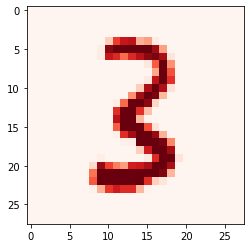

Reconstructed


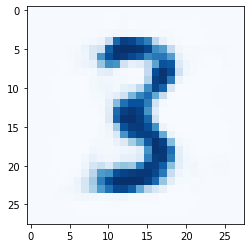

Orignial


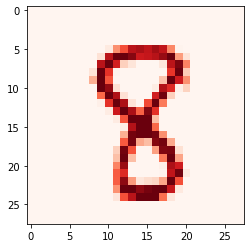

Reconstructed


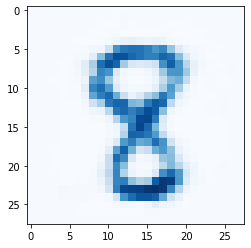

Orignial


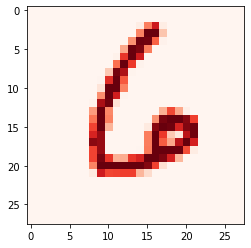

Reconstructed


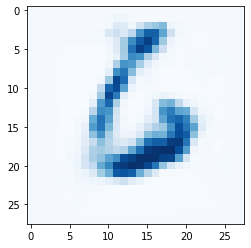

Orignial


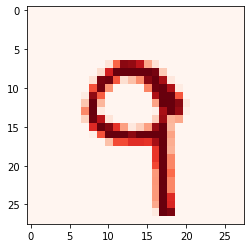

Reconstructed


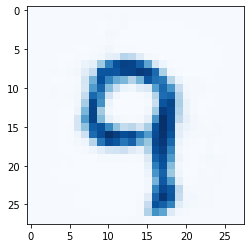

Orignial


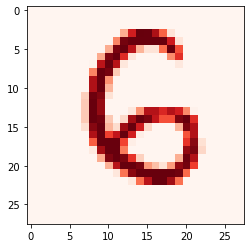

Reconstructed


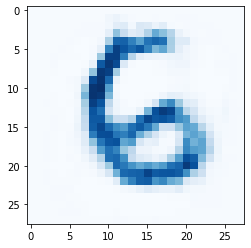

Orignial


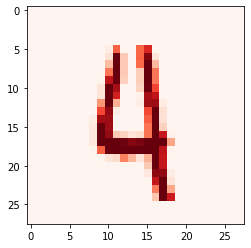

Reconstructed


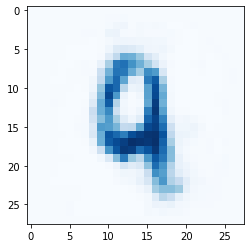

Orignial


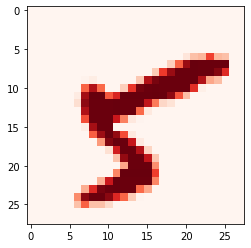

Reconstructed


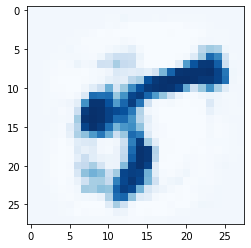

Orignial


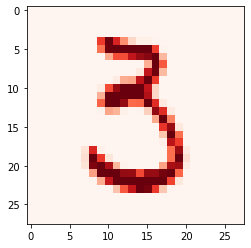

Reconstructed


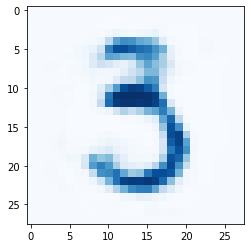

Orignial


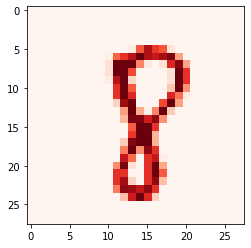

Reconstructed


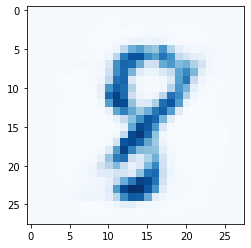

Orignial


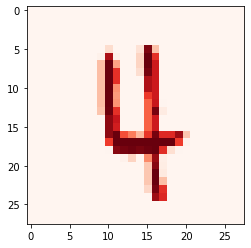

Reconstructed


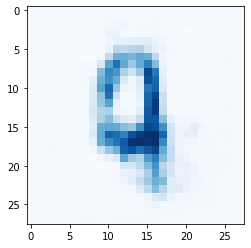

Orignial


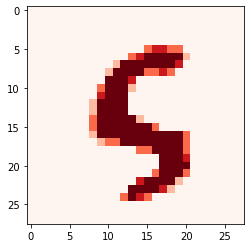

Reconstructed


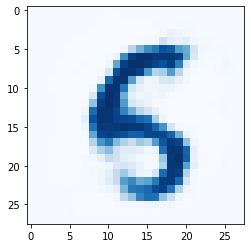

Orignial


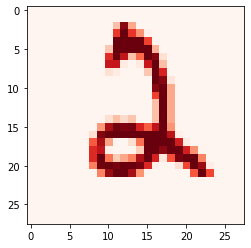

Reconstructed


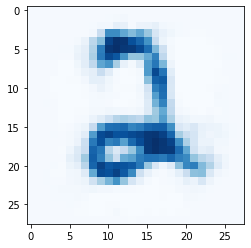

Orignial


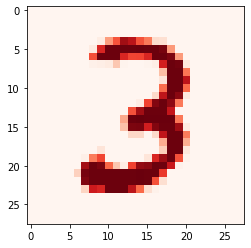

Reconstructed


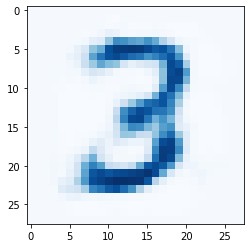

Orignial


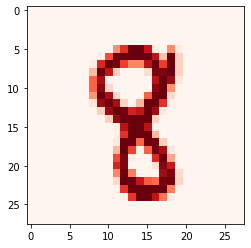

Reconstructed


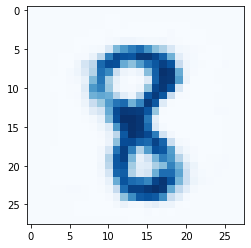

Orignial


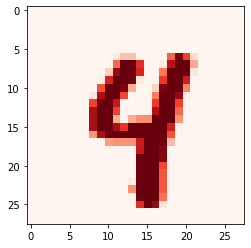

Reconstructed


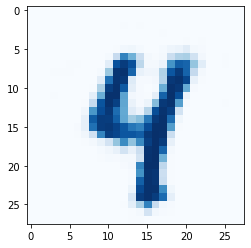

Orignial


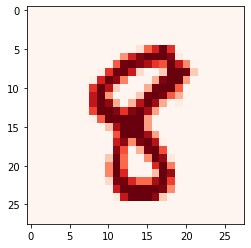

Reconstructed


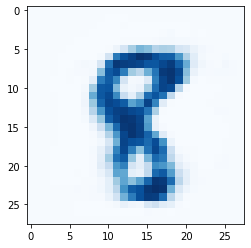

Orignial


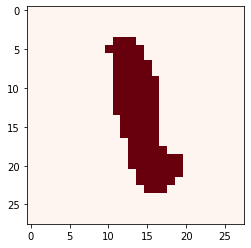

Reconstructed


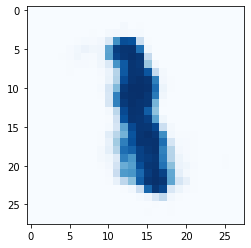

Orignial


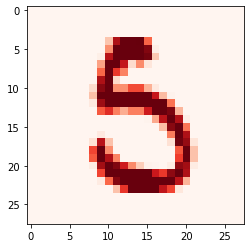

Reconstructed


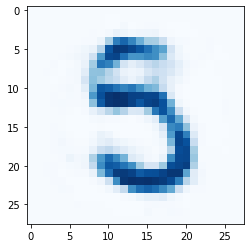

Orignial


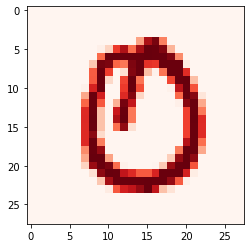

Reconstructed


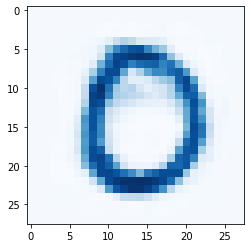

Orignial


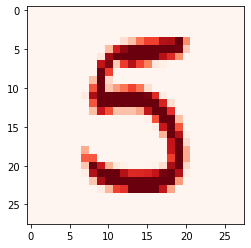

Reconstructed


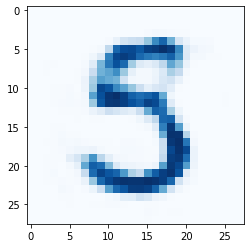

Orignial


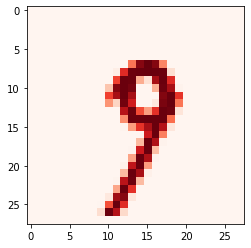

Reconstructed


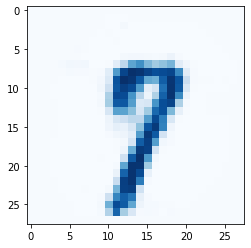

Orignial


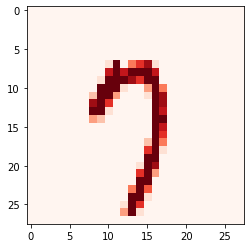

Reconstructed


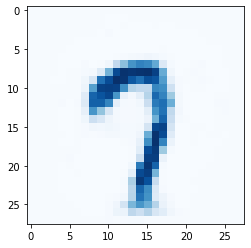

Orignial


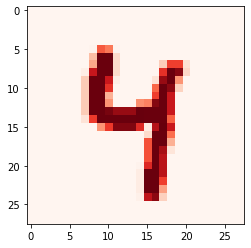

Reconstructed


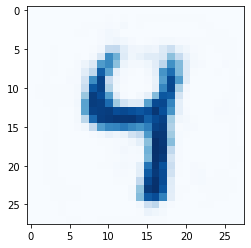

Orignial


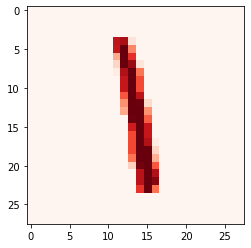

Reconstructed


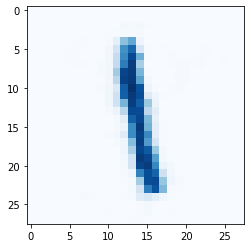

Orignial


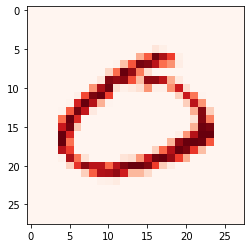

Reconstructed


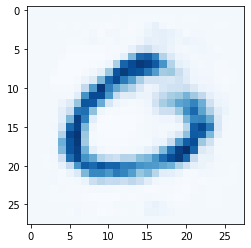

Orignial


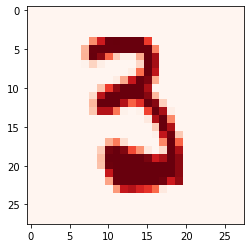

Reconstructed


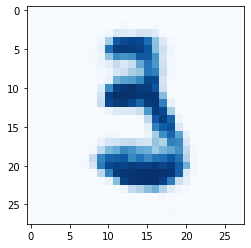

Orignial


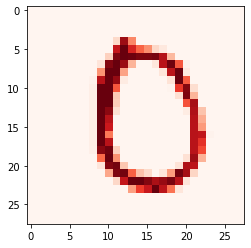

Reconstructed


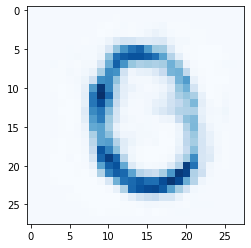

Orignial


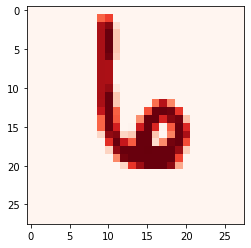

Reconstructed


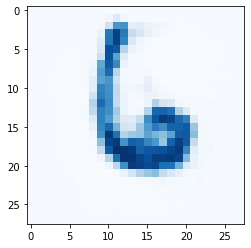

Orignial


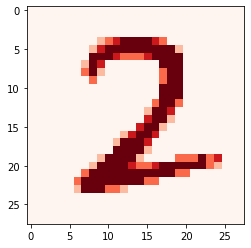

Reconstructed


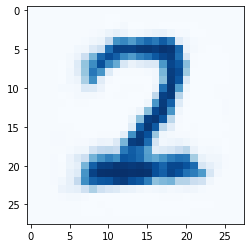

Orignial


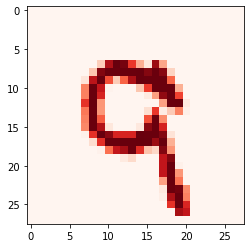

Reconstructed


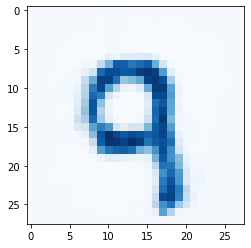

Orignial


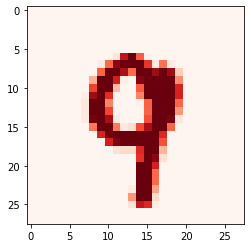

Reconstructed


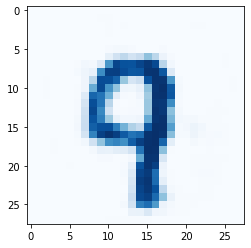

Orignial


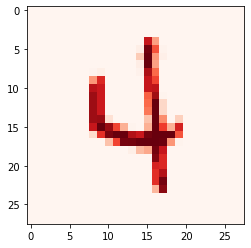

Reconstructed


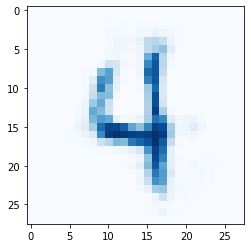

Orignial


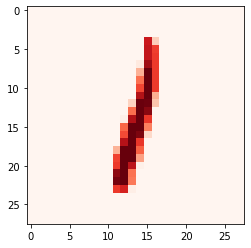

Reconstructed


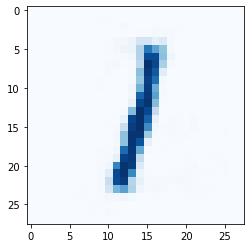

Orignial


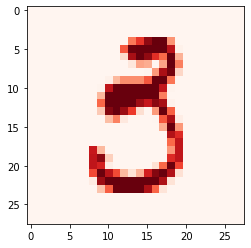

Reconstructed


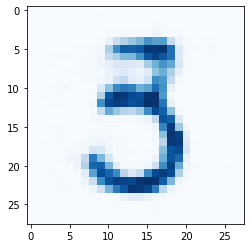

Orignial


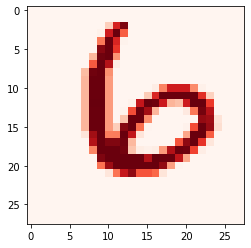

Reconstructed


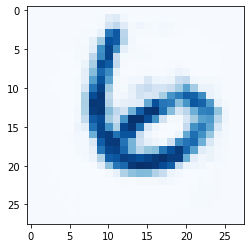

Orignial


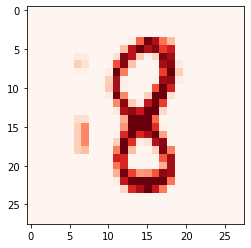

Reconstructed


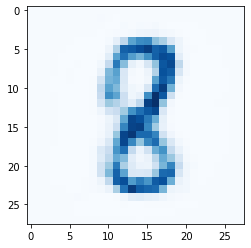

Orignial


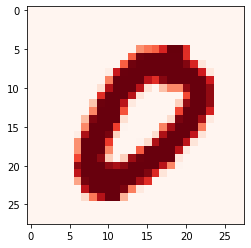

Reconstructed


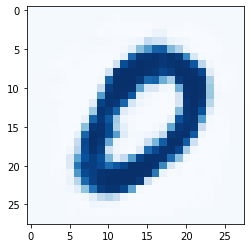

Orignial


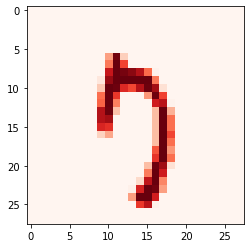

Reconstructed


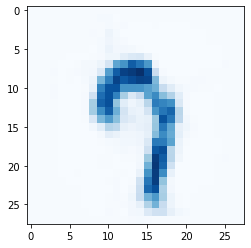

Orignial


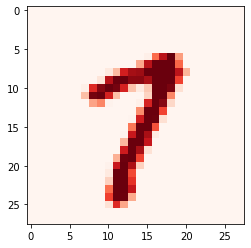

Reconstructed


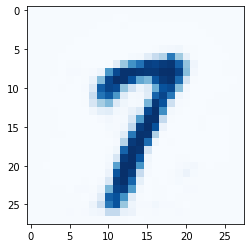

Orignial


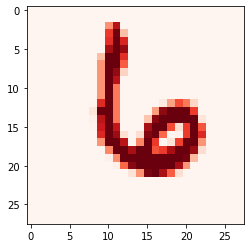

Reconstructed


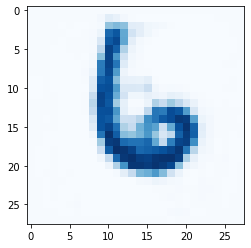

Orignial


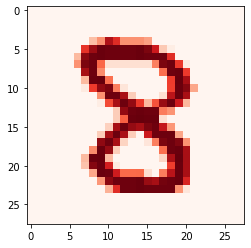

Reconstructed


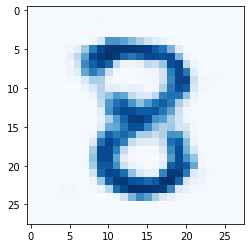

Orignial


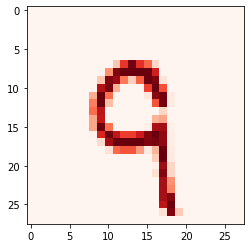

Reconstructed


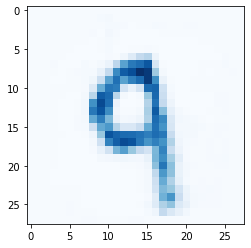

Orignial


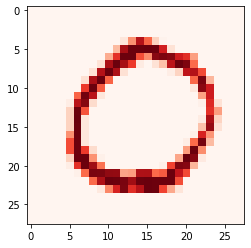

Reconstructed


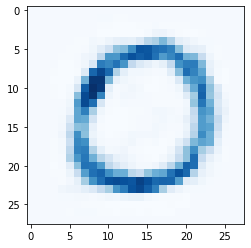

Orignial


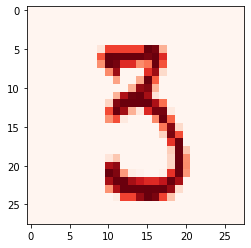

Reconstructed


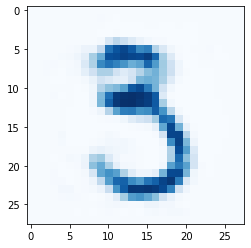

Orignial


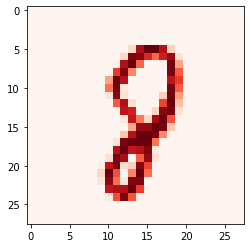

Reconstructed


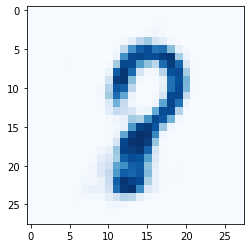

Orignial


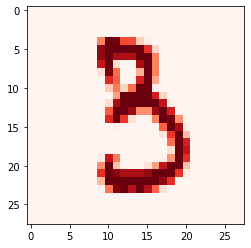

Reconstructed


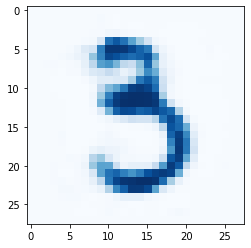

Orignial


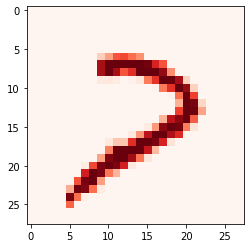

Reconstructed


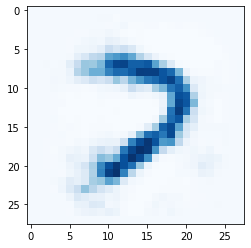

Orignial


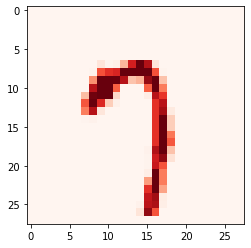

Reconstructed


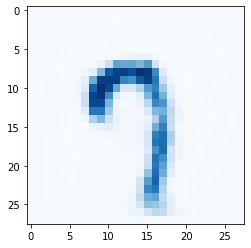

Orignial


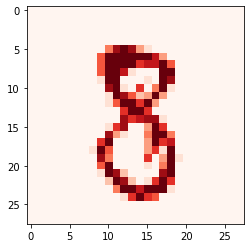

Reconstructed


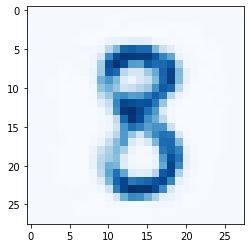

Orignial


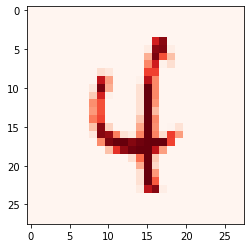

Reconstructed


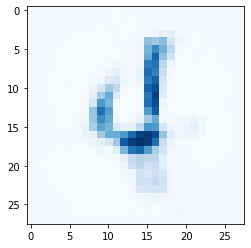

Orignial


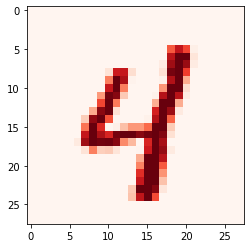

Reconstructed


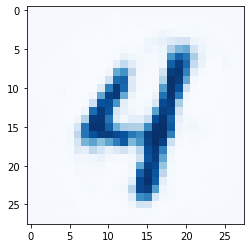

Orignial


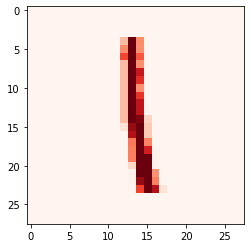

Reconstructed


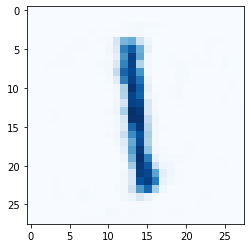

Orignial


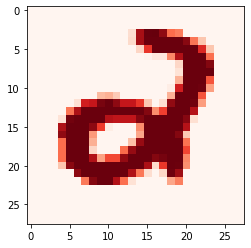

Reconstructed


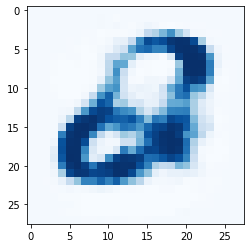

Orignial


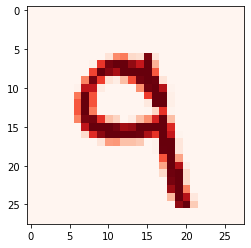

Reconstructed


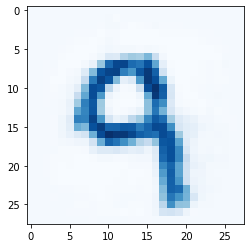

Orignial


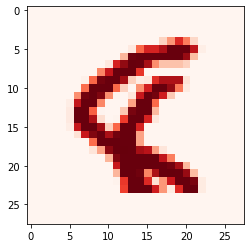

Reconstructed


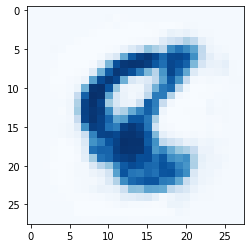

Orignial


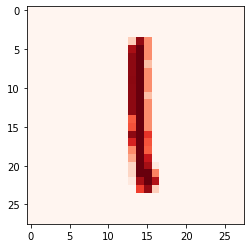

Reconstructed


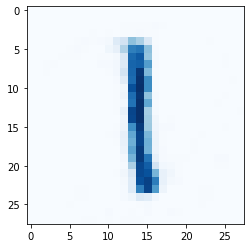

Orignial


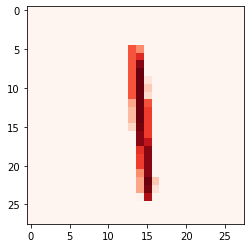

Reconstructed


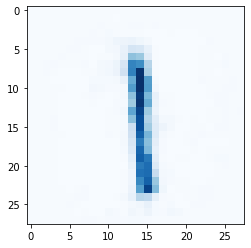

Orignial


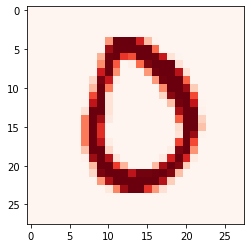

Reconstructed


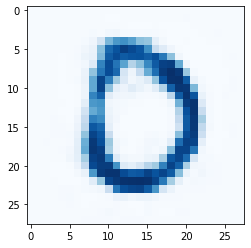

Orignial


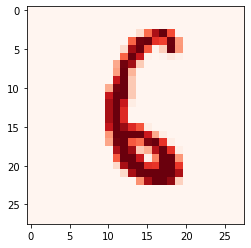

Reconstructed


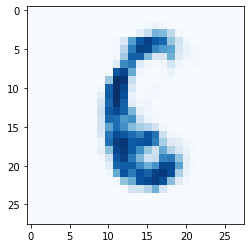

Orignial


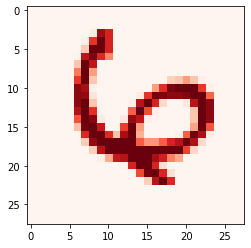

Reconstructed


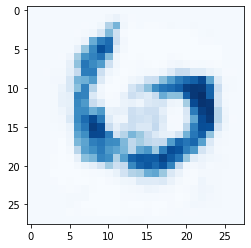

Orignial


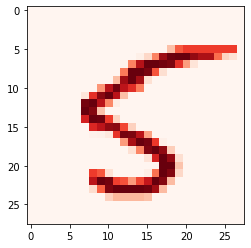

Reconstructed


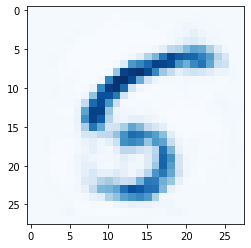

Orignial


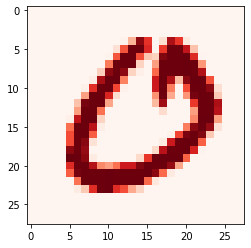

Reconstructed


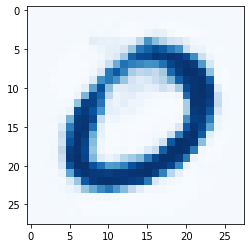

Orignial


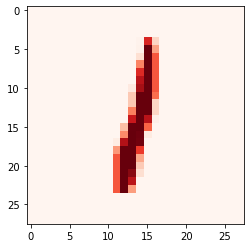

Reconstructed


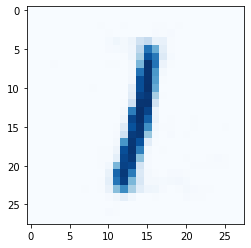

Orignial


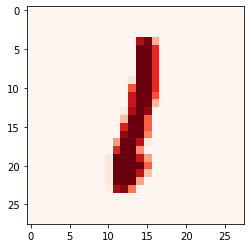

Reconstructed


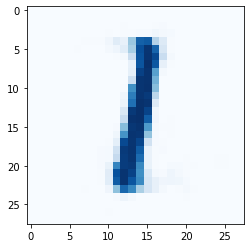

Orignial


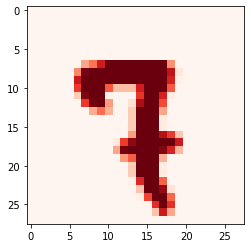

Reconstructed


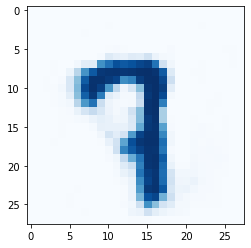

Orignial


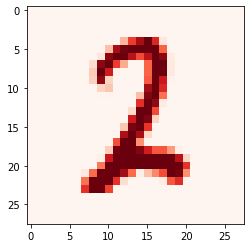

Reconstructed


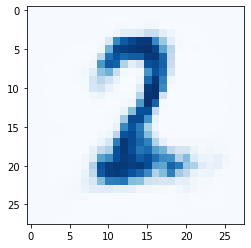

Orignial


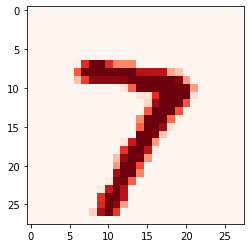

Reconstructed


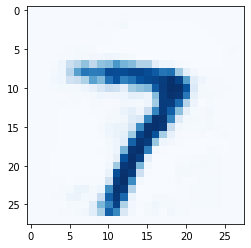

Orignial


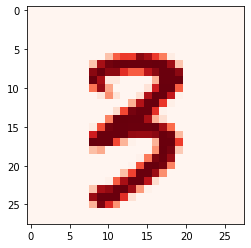

Reconstructed


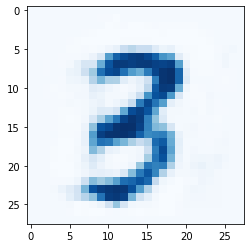

Orignial


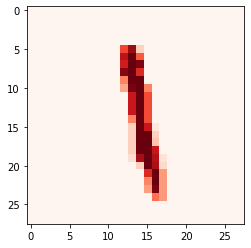

Reconstructed


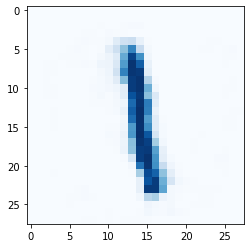

Orignial


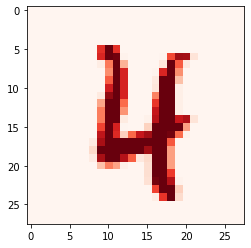

Reconstructed


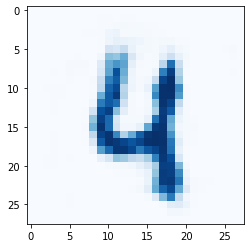

Orignial


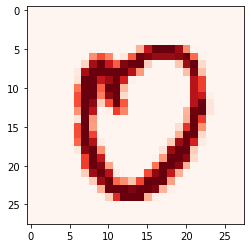

Reconstructed


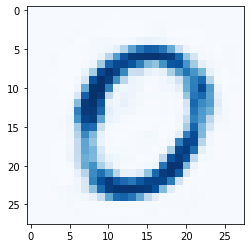

Orignial


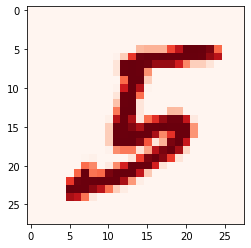

Reconstructed


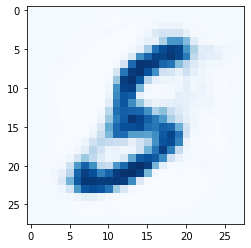

Orignial


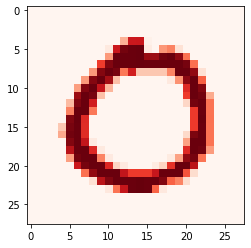

Reconstructed


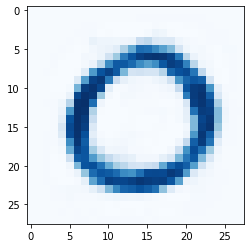

Orignial


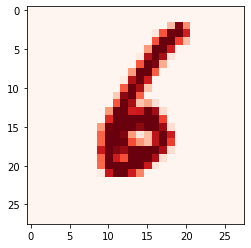

Reconstructed


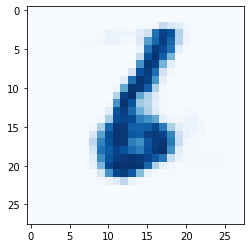

Orignial


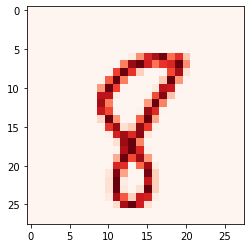

Reconstructed


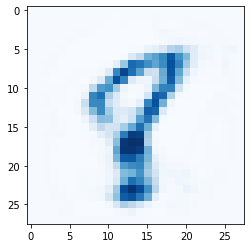

Orignial


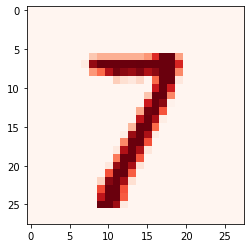

Reconstructed


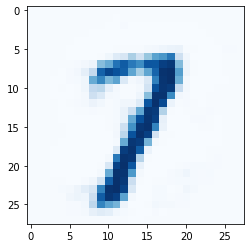

Orignial


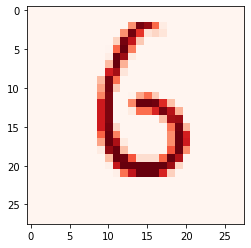

Reconstructed


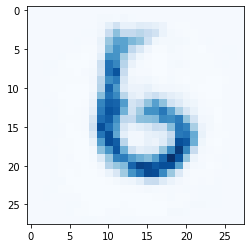

Orignial


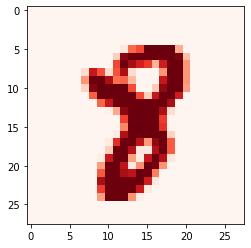

Reconstructed


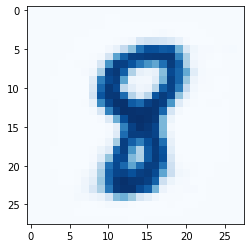

Orignial


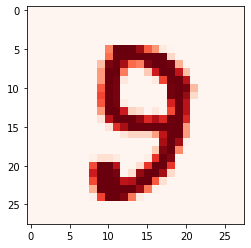

Reconstructed


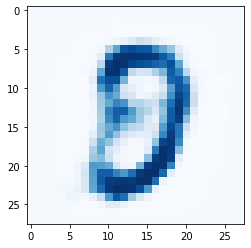

Orignial


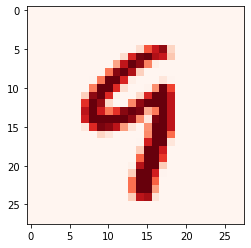

Reconstructed


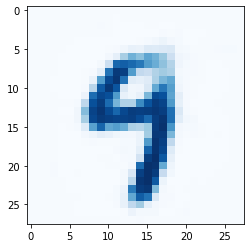

Orignial


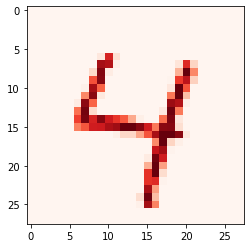

Reconstructed


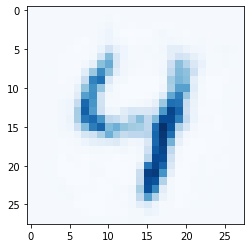

Orignial


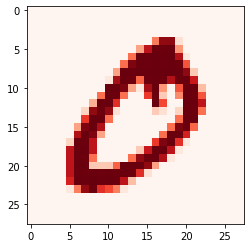

Reconstructed


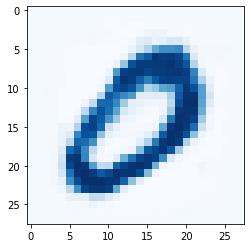

Orignial


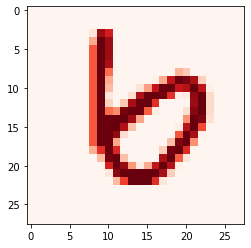

Reconstructed


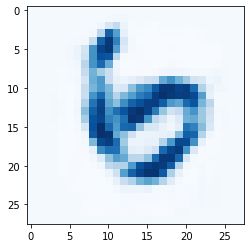

Orignial


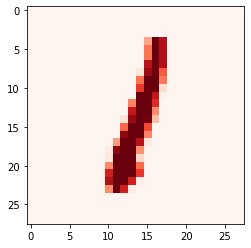

Reconstructed


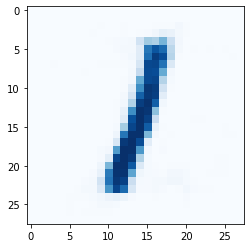

Orignial


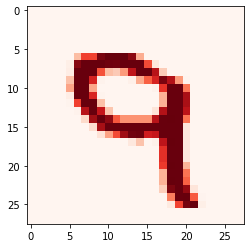

Reconstructed


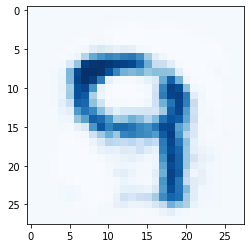

Orignial


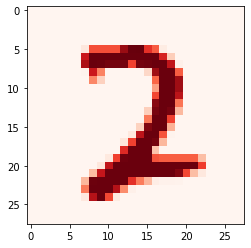

Reconstructed


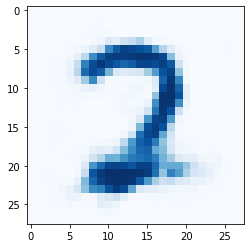

Orignial


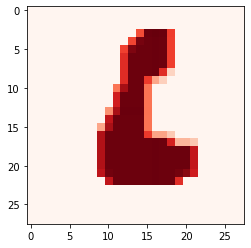

Reconstructed


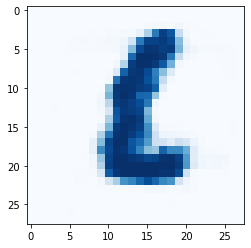

Orignial


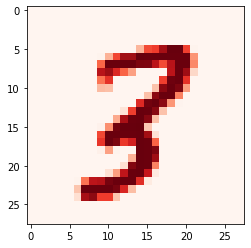

Reconstructed


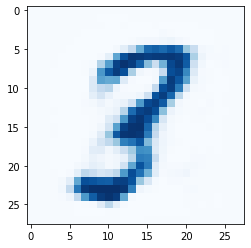

Orignial


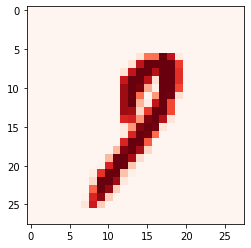

Reconstructed


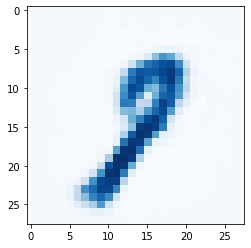

Orignial


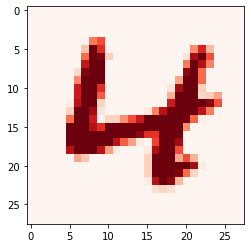

Reconstructed


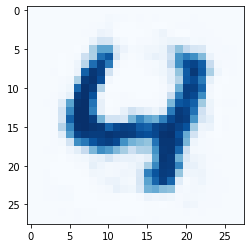

Orignial


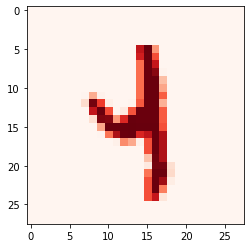

Reconstructed


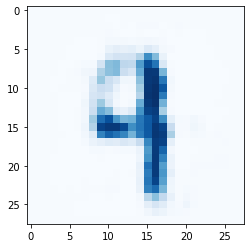

Orignial


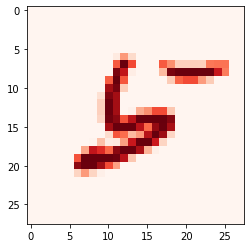

Reconstructed


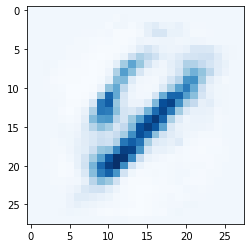

Orignial


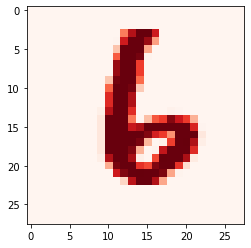

Reconstructed


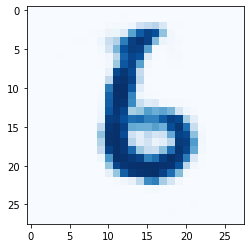

Orignial


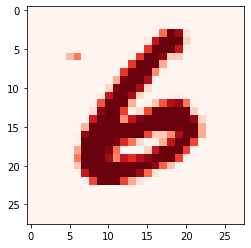

Reconstructed


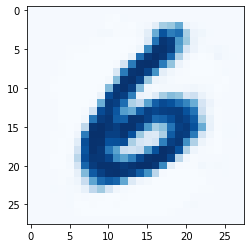

Orignial


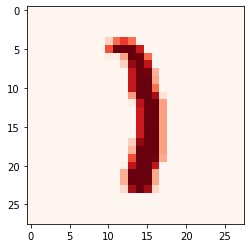

Reconstructed


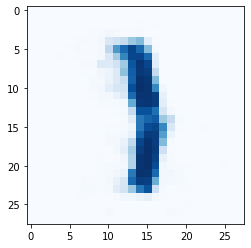

Orignial


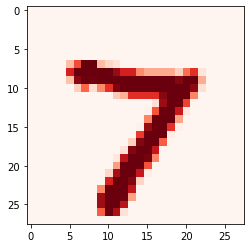

Reconstructed


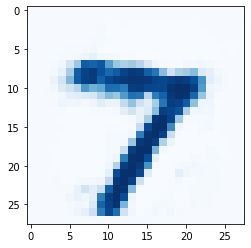

Orignial


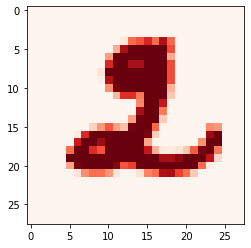

Reconstructed


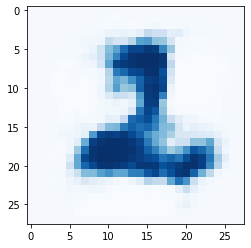

Orignial


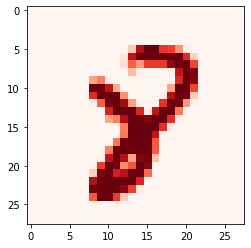

Reconstructed


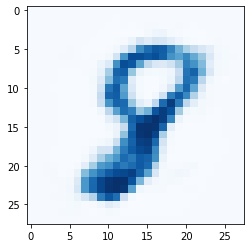

Orignial


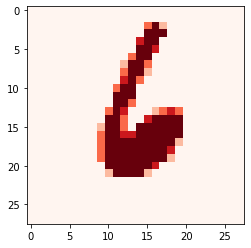

Reconstructed


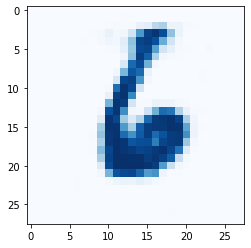

Orignial


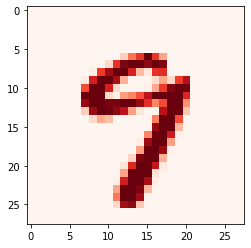

Reconstructed


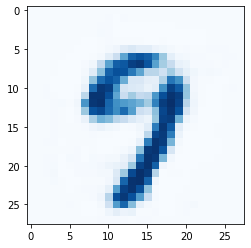

In [53]:
# load into arrays
imgs = []
recon = []
labels = []
orig_or_recon = []
values = []

with open('M2.51_ae_data.csv', newline='') as f:
    csv_data = csv.reader(f)
    for row in csv_data:
        labels.append(row[0])
        orig_or_recon.append(row[1])
        values.append(row[2:])
        

labels = numpy.asfarray(labels)
orig_or_recon = numpy.asfarray(orig_or_recon)
values = numpy.asfarray(values)
print(numpy.shape(values))

for i in range(0,len(labels)):
    if orig_or_recon[i] == -10:
        print('Orignial')
        imgs.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Reds') 
        plt.show()
    else:
        print('Reconstructed')
        recon.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Blues') 
        plt.show()

        
   

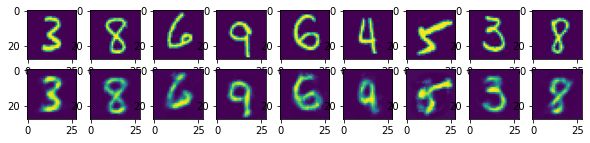

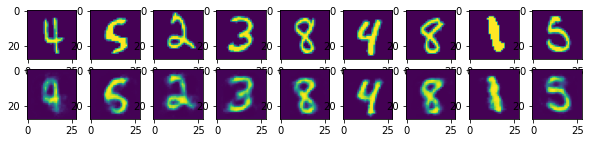

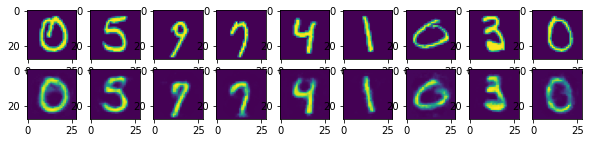

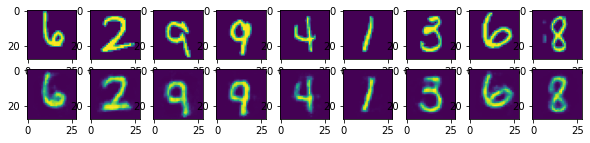

In [54]:
for k in range(0, num_epochs): # plot the with every dimension
    plt.figure(figsize=(10, 2))

    for i, item in enumerate(imgs): # enumerate - get counter per loop
        if i >= 9: break            # plot first 9 images
        plt.subplot(2, 9, i+1)
        item = imgs[k*9+i].reshape(-1, 28, 28)    
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):  
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        item = recon[k*9+i].reshape(-1, 28, 28)
        plt.imshow(item[0])